## Causal Inference

#### *02 December 2019*
#### *DATA 1010*

In [1]:
using Distributions, Plots
gr(fontfamily = "Palatino", legend = false)

*Introduction*. As you've undoubtedly heard in introductory statistics classes, *association does not imply causation*. For example, suppose that your compnay makes a scatter plot and observes that higher ad expenditures are associated with higher revenue figures: 

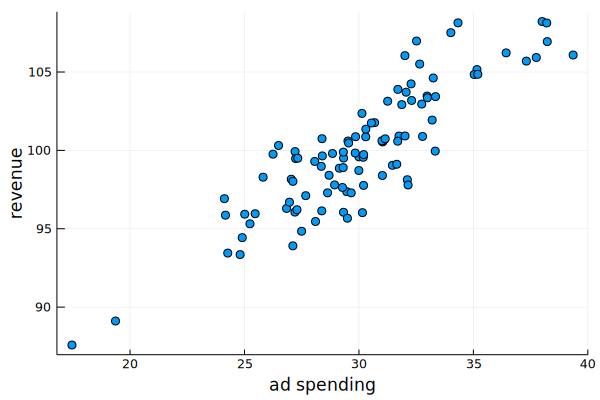

In [2]:
using Distributions, Plots
gr(fontfamily = "Palatino", legend = false)
scatter([Tuple(c) for c in eachcol(rand(MvNormal([30.0,100], [15.0 12; 12 13]), 100))], 
        xlabel = "ad spending", ylabel = "revenue")

---

## Problem 1

Does it follow that ad spending does lead to increased revenues, on average? Think of another reason that ad buys and revenue figures might be associated.

*Solution*. 

---

*Association does not imply causation* is a cautionary mantra, and as such it raises the important question *How can we use statistics to discern cause?* There are many applications in business and science where the distinction between association and causation is exactly what we're interested in. 

Today we will develop the **counterfactual model** for describing causation mathematically. The idea is to model causal relationships using random variables which describe **potential outcomes**. 

For example, suppose you choose to drive rather than take the train to work, and you end up being late. It's natural to wonder *would I have been late if I'd driven?* In your mind, you're pondering two random variables: the amount of time $C_{\text{train}}$ that it would have taken if you'd chosen the train, and the amount of time $C_{\text{car}}$ that it was going to take if you drove. You would model both of these as random variables since you don't their values at the outset of the trip. When your journey is complete, you've been able to observe the value of one of these random variables, but not the other. Given your decision $X \in \{\text{train}, \text{car}\}$, your observed outcome is $Y = C_X$. 

To simplify, let's let $C_{\text{train}}$ be 0 if you're on time and 1 if you're late. Similarly, we let $C_{\text{car}}$ be 0 if you're on time and 1 if you're late. Also, we'll use $X = \text{train}$ and $X=0$ interchangeably, as well as $X = \text{car}$ and $X=1$ (in other words, encode train and car as 0 and 1, respectively). 


## Problem 2

Suppose that the joint distribution of $X$, $Y$, $C_0$ and $C_1$ is compatible with the uniform distribution on the rows of the following table of outcomes. 

$$
\begin{array}{cccc}
{X} & {Y} & {C_{\text{train}}} & {C_{\text{car}}} \\ \hline 
\text{train }(0) & {0} & {0} & * \\ 
\text{train }(0) & {0} & {0} & * \\ 
\text{train }(0) & {0} & {0} & * \\ 
\text{train }(0) & {0} & {0} & * \\ \hline 
\text{car }(1) & {1} & * & {1} \\ 
\text{car }(1) & {1} & * & {1} \\ 
\text{car }(1) & {1} & * & {1} \\ 
\text{car }(1) & {1} & * & {1}
\end{array}
$$

Note that the asterisks indicate *counterfactual* outcomes which are not observed. 

We define the **association** to be 

$$
\alpha = \mathbb{E}[Y | X = 1] - \mathbb{E}[Y | X = 0]
$$

and the **average causal effect** to be 

$$
\theta = \mathbb{E}[C_1] - \mathbb{E}[C_0].
$$

Find the association as well as the largest and smallest possible values for the average causal effect. Describe a scenario in which the measure which gives rise to these extreme average causal effect values might be plausible.

---

The punch line of Problem 2 is still negative: it tells us that the missing counterfactual outcomes can make it impossible to use association to say something about the causal effect. However, this is not always the case.

## Problem 3

Prove the following theorem. 

Suppose that you flip a coin every day to determine whether to take the train or car. In other words, suppose that $X$ is independent of $(C_0, C_1)$. Then $\alpha = \theta$. In other words, association and average causal effect are equal.

*Solution*. 

---

A study in which the treatment value $X$ is not randomly assigned is called an **observational** study. Observational studies are subject to **confounding** from variables $Z$ such as the weather in the scenario described in Problem 2. In that situation, $Z$ was associated with both $X$ and $(C_0, C_1)$, and their non-independence led to a difference between $\alpha$ and $\theta$ to be different.

However, if $X$ and $(C_0, C_1)$ are independent *conditioned on $Z$*, and if we record the value of $Z$ as well as $X$ and $Y$ in our study, then we can obtain an unbiased estimate of the causal effect by from an unbiased estimator of the association by performing that estimate *within each $Z$ group* and averaging. This is called the **adjusted treatment effect**. 

## Problem 4

Suppose that the probability measure on $(X,Y,Z,C_0,C_1)$ is uniform on the rows of the following table ($Z = 0$ means good weather and $Z = 1$ means bad weather). 

$$
\begin{array}{ccccc}
{X} & {Y} & {Z} & {C_{\text{0}}} & {C_{\text{1}}} \\ \hline 
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 & 1 \\ \hline
0 & 0 & 1 & 0 & 1 \\
0 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 0 & 1 \\
1 & 1 & 1 & 0 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1
\end{array}
$$

(a) Compute the association $\alpha$. 

(b) Compute the average causal effect $\theta$. 

(c) Show that $X$ and $(C_0, C_1)$ are conditionally independent given $Z$, and compute the adjusted treatment effect. 

*Solution*. 

---



# The counterfactual model for continuous random variables

Although we've focused on binary random variables, essentially the same analysis carries over to continuous random variables. If $X$ is real-valued, then the counterfactual vector $(C_0, C_1)$ becomes a counterfactual **process** $\{C(x) : x \in \mathbb{R}\}$ which specifies the outcome $Y$ that results from each possible value $x$ of $X$. As in the binary case, only one of the values of the random function $C$ is ever seen for a given observation. 

## Problem 5

(a) Suppose that $Z$ is a $\text{Uniform}(0,10)$ random variable and $U$ and $V$ are $\operatorname{Uniform}(0,1)$ and $\operatorname{Uniform}(-5,5)$ random variables (respectively), which are independent. Suppose that $X = Z$ and that $C = \left\{ \begin{array}{cl} x \mapsto x + \sin (Ux) & \text{if }Z + V > 5 \\ x \mapsto 5 + U & \text{if }Z + V < 5 \\ \end{array} \right.$. Plot several instances of $C$, over $[0,10]$. 

(b) Draw 1000 observations from the joint distribution on $X\sim\operatorname{Unif}(0,10)$ and $Y = C(X)$, and make a scatter plot. 

(c) The **causal regression function** is $\theta(x) = \mathbb{E}[C(x)]$. Find the causal regression function in the example above. 

(d) How does the causal regression function compare to the regression function? Feel free to eyeball the regression function from the graph. 

---

The formula for the adjusted treatment effect in the continuous case becomes 

$$
\theta(x) = \int \mathbb{E}(Y | X=x, Z=z) f_Z(z) dz, 
$$

where $f_Z$ is the density of $Z$ (note that this is the same idea as in the discrete case: we're averaging the $z$-specific estimates $\mathbb{E}(Y | X=x, Z=z)$, weighted by how frequently those $z$-values occur). And as in the discrete case, the adjusted treatment effect is equal to the causal regression function $\theta(x)$ if $X$ and $\{C(x) : x \in \mathbb{R}\}$ are conditionally independent given $Z$. This implies that, again assuming conditional independence of $X$ and $C$ given $Z$, if $\widehat{r}(x,z)$ is a consistent estimator of $\mathbb{E}[Y | X = x, Z = z]$, then $\frac{1}{n}\sum_{i=1}^n\widehat{r}(x, Z_i)$ is a consistent estimator of $\theta(x)$. 

If the regression function given $X$ and $Z$ is linear (that is, $r(x, z)=\mathbb{E}[Y | X = x, Z = z] = \beta_{0}+\beta_{1} x+\beta_{2} z$), then we can control for $Z$ merely by including $Z$ as a feature in the ordinary least squares regression. In other words, if $X$ is independent of $C$ given $Z$, then $\widehat{\theta}(x)=\widehat{\beta}_{0}+\widehat{\beta}_{1} x+\widehat{\beta}_{2} \overline{Z}$ is a consistent estimator of $\theta(x)$, where $\widehat{\beta}_{0}, \widehat{\beta}_{1}, \widehat{\beta}_{2}$ are the OLS coefficients.

## Problem 6

Suppose that $U_X, U_Z,$ and $U_Y$ are independent $\operatorname{Uniform}(0,1)$ random variables, and that 

$$
\begin{align*}
X &= U_X \\
Z &= 0.9X + 0.1U_Z \\
C(x) &= x - 2Z + 0.01U_{Y}.
\end{align*}
$$

(a) Calculate $r(x,z) = \mathbb{E}[Y | X = x, Z = z]$

(b) Calculate $\theta(x) = \mathbb{E}[C(x)]$. 

(c) Suppose that $\widehat{r}$ is the OLS estimator of $Y$ with features $X$ and $Z$. Show that $\frac{1}{n}\sum_{i=1}^n\widehat{r}(x, Z_i)$ is a consistent estimator of $\theta(x)$. 

(d) Show that if $\widehat{r}$ is the OLS estimator of $Y$ with $X$ as the lone regressor that $\widehat{r}(x)$ does *not* converge to $\theta(x)$ as the sample size tends to infinity. 